In [2]:
## Homework - Whale Analysis ##

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [49]:
# Reading, cleaning and combining data into a single frame #

## Borrowing code from previous projects module 3 ##

whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")

# Read in data
whale_returns = pd.read_csv(
    whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns = pd.read_csv(
    algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history = pd.read_csv(
    sp500_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Check for nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()
sp500_history.isnull().mean() * 100
sp500_history.isnull().sum()

# Drop na
whale_returns = whale_returns.dropna()
algo_returns = algo_returns.dropna()
sp500_history = sp500_history.dropna()

# Validate no more missing values
whale_returns.isnull().sum()
whale_returns.head()
algo_returns.isnull().sum()
algo_returns.head()
sp500_history.isnull().sum()
sp500_history.head()

# Sort Date as Index
whale_returns = whale_returns.sort_index()
algo_returns = algo_returns.sort_index()
sp500_history = sp500_history.sort_index()

/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_49280/566409041.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns = pd.read_csv(
/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_49280/566409041.py:13: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns = pd.read_csv(
/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_49280/566409041.py:16: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://p

In [50]:
# Convert string to float for clean numeric format

sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').str.replace(',', '').astype(float)

# Convert S&P 500 closing prices to returns

sp500_returns = sp500_history.pct_change().dropna()

In [71]:
# Join daily returns files together into a single data frame with columns for each portfolio's returns

# Create a new pivot table where the columns are the closing prices for each ticker
all_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
all_returns.sort_index(inplace=True)

# Rename columns

all_returns.rename(columns = {"SOROS FUND MANAGEMENT LLC": "Soros"},  
          inplace = True)
all_returns.rename(columns = {"PAULSON & CO.INC. ": "Paulson"},  
          inplace = True)
all_returns.rename(columns = {"TIGER GLOBAL MANAGEMENT LLC": "Tiger"},  
          inplace = True)
all_returns.rename(columns = {"BERKSHIRE HATHAWAY INC": "BerkHath"},  
          inplace = True)
all_returns.rename(columns = {"Algo 1": "A1"},  
          inplace = True)
all_returns.rename(columns = {"Algo 2": "A2"},  
          inplace = True)
all_returns.rename(columns = {"Close": "SP500"},  
          inplace = True)

# Display a few rows
all_returns.head()

,Soros,Paulson,Tiger,BerkHath,A1,A2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

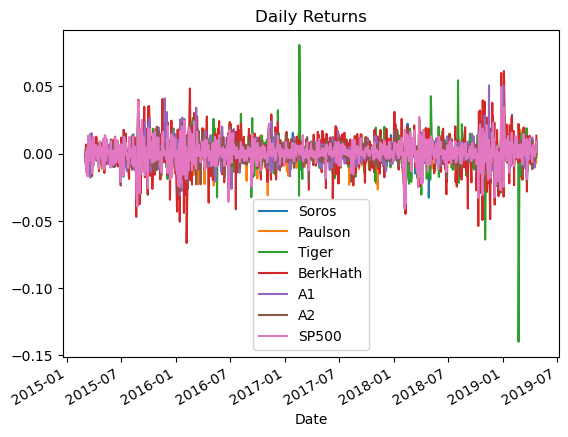

In [72]:
# Calculate and plot daily returns of all portfolios

all_returns.plot(title='Daily Returns')

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

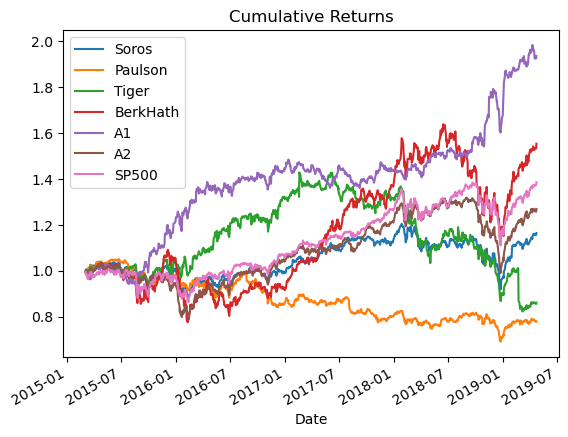

In [73]:
# Calculate and plot cumulative returns for all portfolios
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.plot(title='Cumulative Returns')

In [9]:
# Do any portfolios outperform the S&P 500?
print("These portfolios outperform the S&P 500 Index for the listed time period")
print("------------------------------------------------------------------------")
print("The Algo 1 Portfolio and the Berkshire Hathaway Portfolio both outperformed the S&P 500 for this particular time period")

These portfolios outperform the S&P 500 Index for the listed time period
------------------------------------------------------------------------
The Algo 1 Portfolio and the Berkshire Hathaway Portfolio both outperformed the S&P 500 for this particular time period


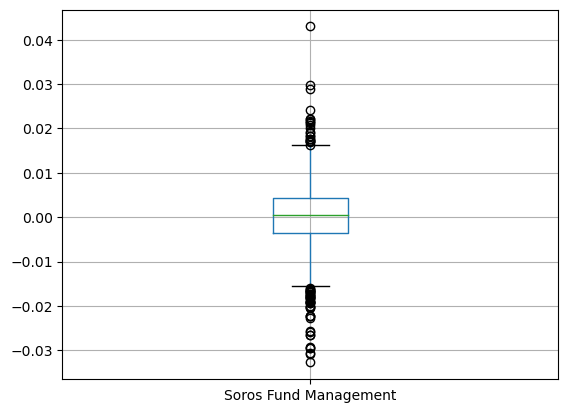

In [10]:
# Create a box plot for each of the returns
all_returns.boxplot(column=['Soros Fund Management'], return_type='axes');

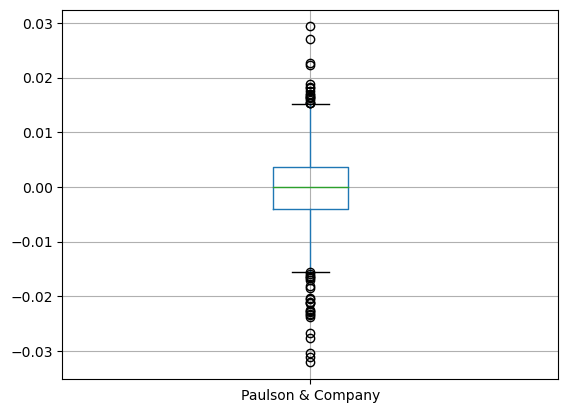

In [11]:
all_returns.boxplot(column=['Paulson & Company'], return_type='axes');

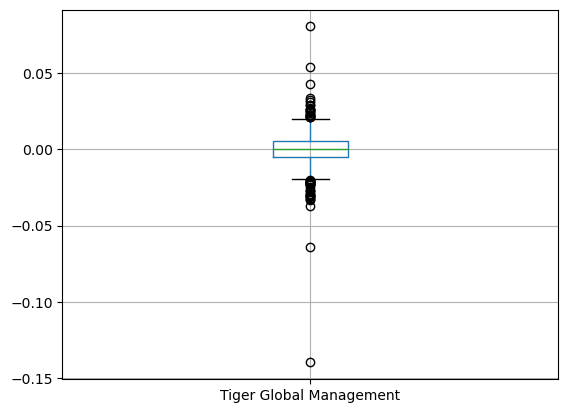

In [12]:
all_returns.boxplot(column=['Tiger Global Management'], return_type='axes');

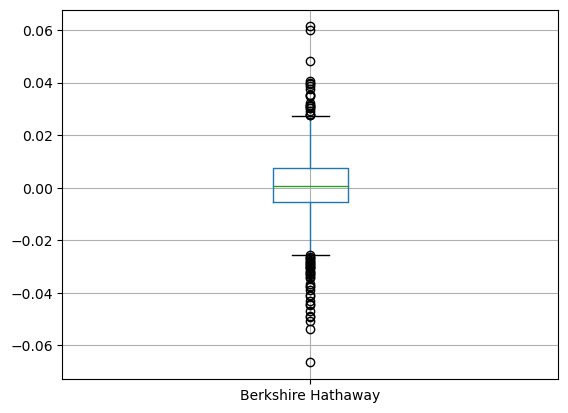

In [13]:
all_returns.boxplot(column=['Berkshire Hathaway'], return_type='axes');

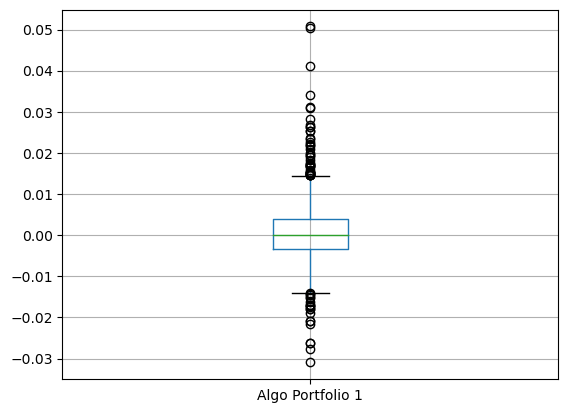

In [14]:
all_returns.boxplot(column=['Algo Portfolio 1'], return_type='axes');

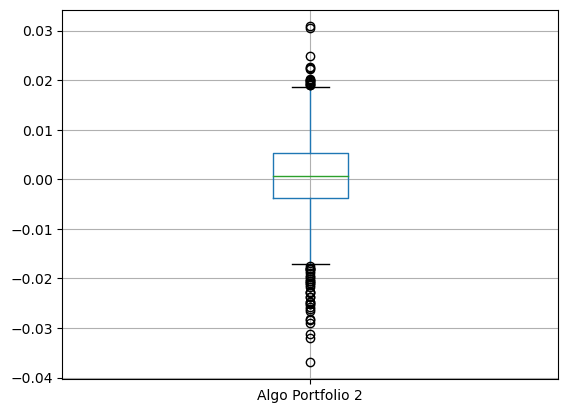

In [15]:
all_returns.boxplot(column=['Algo Portfolio 2'], return_type='axes');

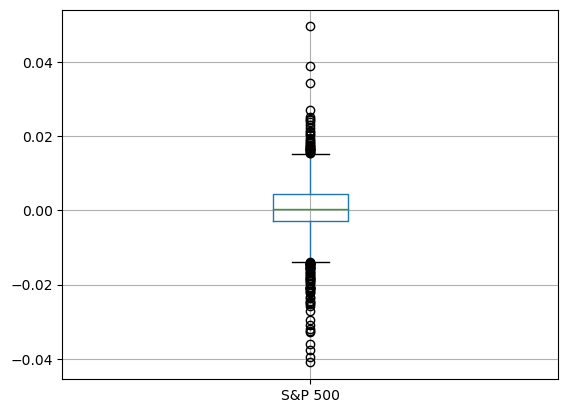

In [16]:
all_returns.boxplot(column=['S&P 500'], return_type='axes');

In [17]:
# Calculate the standard deviation for each portfolio
all_portfolio_std = all_returns.std()
all_portfolio_std

Soros Fund Management      0.007895
Paulson & Company          0.007023
Tiger Global Management    0.010894
Berkshire Hathaway         0.012919
Algo Portfolio 1           0.007620
Algo Portfolio 2           0.008342
S&P 500                    0.008554
dtype: float64

In [18]:
# Determine which portfolios are riskier than the S&P 500
print("Which portfolios are riskier than the S&P 500?")
print("----------------------------------------------")
print("By virtue of a higher standard deviation value, the Berkshire Hathaway and Tiger Global Porfolios are the riskiest")

Which portfolios are riskier than the S&P 500?
----------------------------------------------
By virtue of a higher standard deviation value, the Berkshire Hathaway and Tiger Global Porfolios are the riskiest


In [19]:
# Calculate the annualized standard deviation
annualized_portfolio_std = all_portfolio_std * np.sqrt(252)
annualized_portfolio_std

Soros Fund Management      0.125335
Paulson & Company          0.111488
Tiger Global Management    0.172936
Berkshire Hathaway         0.205077
Algo Portfolio 1           0.120967
Algo Portfolio 2           0.132430
S&P 500                    0.135786
dtype: float64

<Axes: title={'center': 'Rolling 21-day Portfolio Standard Deviation'}, xlabel='Date'>

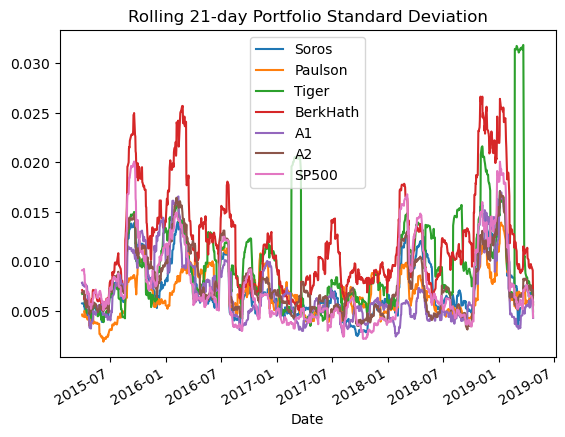

In [74]:
# Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window
rolling_portfolio_std = all_returns.rolling(21).std()

rolling_portfolio_std.isnull().mean() * 100
rolling_portfolio_std.isnull().sum()

rolling_portfolio_std = rolling_portfolio_std.dropna()

rolling_portfolio_std.isnull().sum()
rolling_portfolio_std.head()

rolling_portfolio_std.plot(title='Rolling 21-day Portfolio Standard Deviation')


The Algo 2 portfolio is most closely correlated with the S&P, while the Soros fund is a very close 2nd


,Soros,Paulson,Tiger,BerkHath,A1,A2,SP500
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BerkHath,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
A1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
A2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


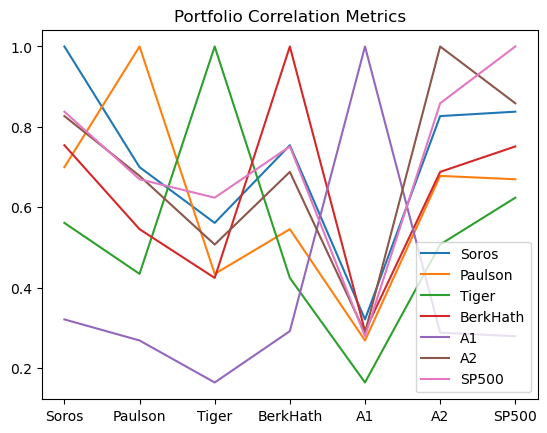

In [75]:
# Calculate and plot the correlation between each portfolio to determine which portfolios mimic the S&P 500
correlation = all_returns.corr()
correlation.plot(title='Portfolio Correlation Metrics')

print('The Algo 2 portfolio is most closely correlated with the S&P, while the Soros fund is a very close 2nd')
correlation

In [22]:
# Calculate covariance of a single portfolio
Algo2_covariance = all_returns['Algo Portfolio 2'].cov(all_returns['S&P 500'])
sp500_covariance = all_returns['S&P 500'].cov(all_returns['Algo Portfolio 2'])

# Calculate variance of S&P 500
Algo2_variance = all_returns['Algo Portfolio 2'].var()
sp500_variance = all_returns['S&P 500'].var()

# Computing beta
Algo2_beta = Algo2_covariance / Algo2_variance
sp500_beta = sp500_covariance / sp500_variance

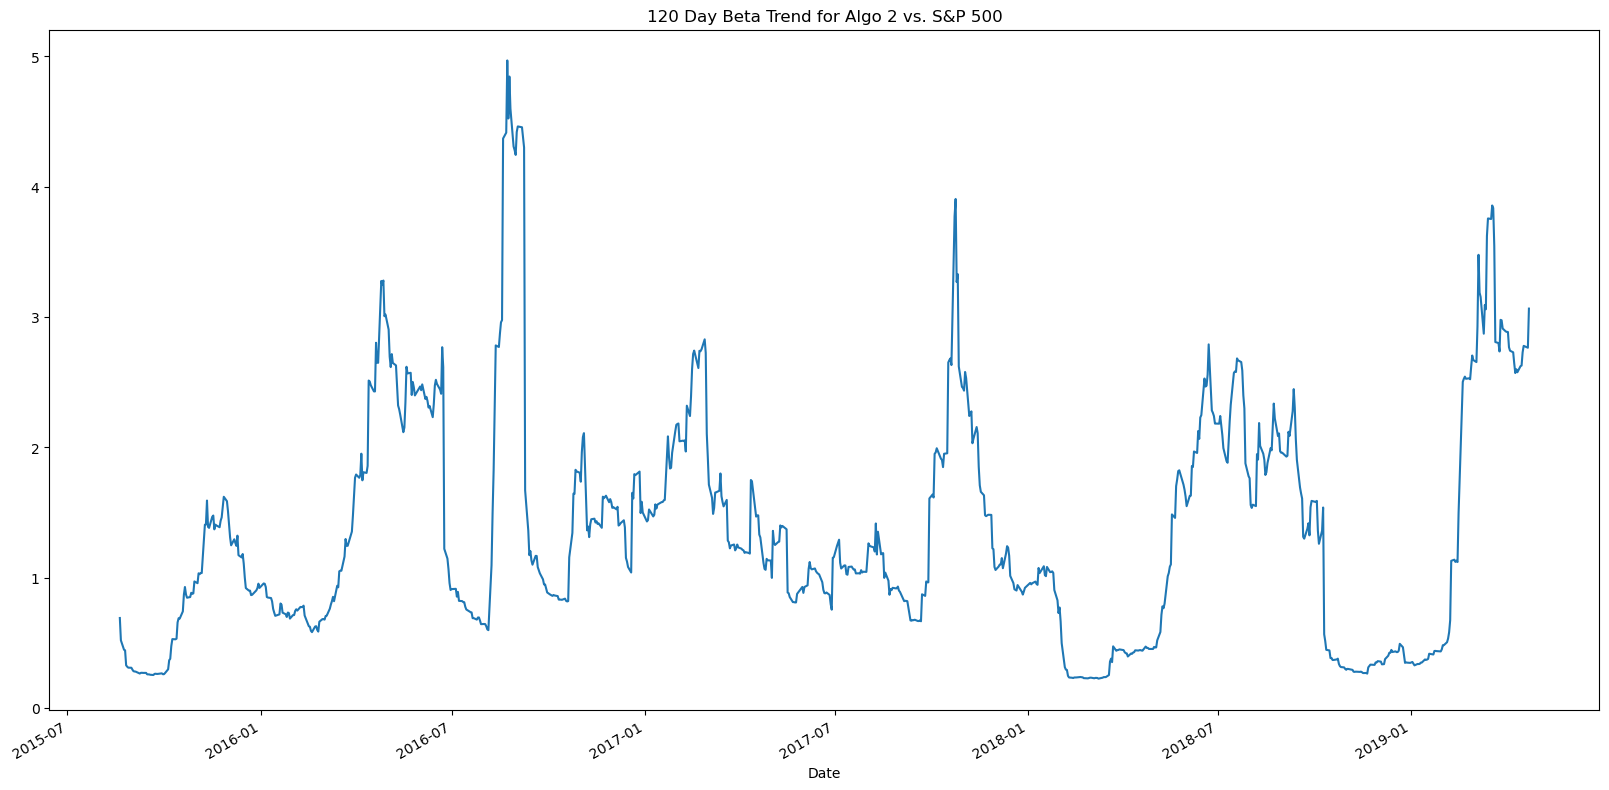

In [78]:
# Plot beta trend for Algo 2 portfolio vs. S&P 500 index

rolling_Algo2_covariance = all_returns['A2'].rolling(window=120).cov(all_returns['SP500'])
rolling_variance = all_returns['SP500'].rolling(window=30).var()
rolling_Algo2_beta = rolling_Algo2_covariance / rolling_variance
rolling_Algo2_beta.dropna(inplace = True)

ax = rolling_Algo2_beta.plot(figsize=(20, 10), title='120 Day Beta Trend for Algo 2 vs. S&P 500')

In [82]:
# Use `ewm` to calculate the rolling window
emv_all_portfolio_std = all_portfolio_std.ewm(span=21).mean()
 
# printing Dataframe
emv_all_portfolio_std

Soros Fund Management      0.007895
Paulson & Company          0.007438
Tiger Global Management    0.008702
Berkshire Hathaway         0.009911
Algo Portfolio 1           0.009362
Algo Portfolio 2           0.009149
S&P 500                    0.009038
dtype: float64

In [81]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False, inplace = True)
sharpe_ratios

A1          1.378648
SP500       0.648267
BerkHath    0.621810
A2          0.501364
Soros       0.356417
Tiger      -0.121060
Paulson    -0.483570
dtype: float64

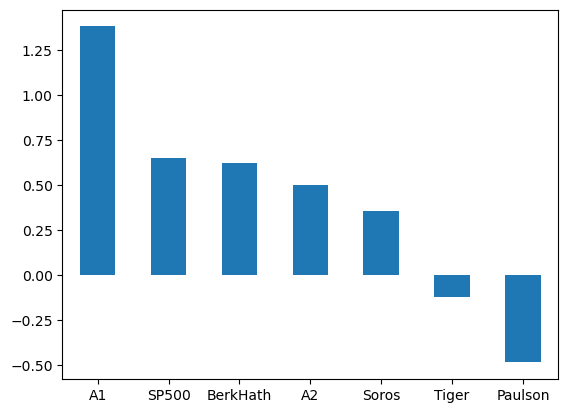

In [83]:
# Visualize the sharpe ratios as a bar plot
ax = sharpe_ratios.plot.bar(y='Sharpe Ratios', rot=0)

In [27]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

print("The algorithmic portfolios far outperformed the whale portfolios, and they outperformed the S&P 500 for the same time period by a smaller margin.")

The algorithmic portfolios far outperformed the whale portfolios, and they outperformed the S&P 500 for the same time period by a smaller margin.


In [28]:
# Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
print("I have constructed a portfolio for the same date range analyzed above for SRPT, RNR, OC, OXY, and CSX.")

I have constructed a portfolio for the same date range analyzed above for SRPT, RNR, OC, OXY, and CSX.


In [61]:
# Reading data from My Portfolio

# Reading, cleaning and combining data into a single frame #

## Borrowing code from previous projects module 3 ##

csx_prices_path = Path("Resources/csx_prices.csv")
oc_prices_path = Path("Resources/oc_prices.csv")
oxy_prices_path = Path("Resources/oxy_prices.csv")
rnr_prices_path = Path("Resources/rnr_prices.csv")
srpt_prices_path = Path("Resources/srpt_prices.csv")

# Read in data
csx_prices = pd.read_csv(
    csx_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

oc_prices = pd.read_csv(
    oc_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

oxy_prices = pd.read_csv(
    oxy_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

rnr_prices = pd.read_csv(
    rnr_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

srpt_prices = pd.read_csv(
    srpt_prices_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


# Check for nulls
csx_prices.isnull().mean() * 100
csx_prices.isnull().sum()
oc_prices.isnull().mean() * 100
oc_prices.isnull().sum()
oxy_prices.isnull().mean() * 100
oxy_prices.isnull().sum()
rnr_prices.isnull().mean() * 100
rnr_prices.isnull().sum()
srpt_prices.isnull().mean() * 100
srpt_prices.isnull().sum()

# Drop na
csx_prices = csx_prices.dropna()
oc_prices = oc_prices.dropna()
oxy_prices = oxy_prices.dropna()
rnr_prices = rnr_prices.dropna()
srpt_prices = srpt_prices.dropna()

# Validate no more missing values
csx_prices.isnull().sum()
csx_prices.head()
oc_prices.isnull().sum()
oc_prices.head()
oxy_prices.isnull().sum()
oxy_prices.head()
rnr_prices.isnull().sum()
rnr_prices.head()
srpt_prices.isnull().sum()
srpt_prices.head()

# Sort Date as Index
csx_prices = csx_prices.sort_index()
oc_prices = oc_prices.sort_index()
oxy_prices = oxy_prices.sort_index()
rnr_prices = rnr_prices.sort_index()
srpt_prices = srpt_prices.sort_index()

/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_49280/3853163515.py:14: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  csx_prices = pd.read_csv(
/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_49280/3853163515.py:17: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  oc_prices = pd.read_csv(
/var/folders/7n/4dkbv5cx2qb_kzxq5jpt6ryw0000gn/T/ipykernel_49280/3853163515.py:20: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pand

In [64]:
# Convert closing prices to daily returns
csx_returns = csx_prices.pct_change().dropna()
oc_returns = oc_prices.pct_change().dropna()
oxy_returns = oxy_prices.pct_change().dropna()
rnr_returns = rnr_prices.pct_change().dropna()
srpt_returns = srpt_prices.pct_change().dropna()

In [66]:
# Combine all stocks in a single DataFrame
portfolio_returns = pd.concat([csx_returns, oc_returns, oxy_returns, rnr_returns, srpt_returns], axis="columns", join="inner")

In [67]:
# Reset Date index
portfolio_returns.sort_index(inplace=True)

In [96]:
# Reorganize portfolio data by having a column per symbol
portfolio_returns.columns = ["CSX", "OC", "OXY", "RNR", "SRPT"]

# Validate no more missing values
portfolio_returns.isnull().sum()
portfolio_returns.head()


# Drop na
portfolio_returns = portfolio_returns.dropna()

In [97]:
# Display sample data
portfolio_returns.head()

,CSX,OC,OXY,RNR,SRPT
Date,,,,,
2018-05-15,0.671435,-0.290538,6.757304,-2.167970,-3.043000
2018-05-16,-3.210541,0.531017,-0.983752,-0.345831,-3.990557
2018-05-17,-0.640157,-1.963258,-191.022549,-3.681424,-2.618273
2018-05-18,-0.003779,-0.455276,-1.000000,-0.118982,-1.793937
2018-05-21,0.120765,-1.947276,-inf,-1.819332,-2.597419


In [102]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
combined_returns = portfolio_returns.dot(weights)

# Display sample data
combined_returns.tail()

Date
2019-05-02   -1.069145
2019-05-03   -9.720375
2019-05-06   -0.437784
2019-05-07   -2.159320
2019-05-08    1.135838
dtype: float64

In [103]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio_returns = pd.concat([all_returns, combined_returns], axis="columns", join="inner")

In [105]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio_returns = combined_portfolio_returns.dropna()

In [109]:
# Calculate the annualized `std`

combined_portfolio_std = combined_portfolio_returns.std()

all_returns.rename(columns = {"0": "Soros"},  
          inplace = True)

anncomb_portfolio_std = combined_portfolio_std * np.sqrt(252)
anncomb_portfolio_std

Soros       0.147210
Paulson     0.117168
Tiger       0.233434
BerkHath    0.247821
A1          0.134171
A2          0.139943
SP500       0.152311
0                NaN
dtype: float64

In [40]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

In [41]:
# Calculate and plot the correlation

In [42]:
# Calculate and plot Beta

In [43]:
# Calculate Annualized Sharpe Ratios

In [44]:
# Visualize the sharpe ratios as a bar plot

In [45]:
# How did My Porfolio of Stocks Perform?